In [1]:
import MeCab

import gc

import numpy as np
import pandas as pd
from tqdm import tqdm

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [3]:
train = pd.read_csv(f'../input/train.csv')
test = pd.read_csv(f'../input/test.csv')

In [4]:
data = pd.concat([train, test])

In [5]:
data = data.reset_index(drop=True)

In [6]:
len(data)

4732

In [7]:
del train, test
gc.collect()

171

In [8]:
mecab = MeCab.Tagger("-Ochasen")

In [9]:
negaposi_dict_df = pd.read_csv("../input/pn_ja.dic.csv", sep=":", encoding="shift-jis", header=None, index_col=0)

In [10]:
negaposi_dict_df = negaposi_dict_df.rename(columns={1: "pronunciation", 2: "adjective", 3: "score"})

In [11]:
negaposi_dict = negaposi_dict_df["score"].to_dict()

In [12]:
def sentence(bodies):
    sentences_list = []
    sentence = []
    for body in tqdm(bodies):
        node = mecab.parseToNode(body)
        sentences = []
        while node:
            word = node.feature.split(',')[6]
            if word == "。":
                sentences.append(sentence)
                sentence = []
                node = node.next
            else:
                sentence.append(word)
                node = node.next
        sentences_list.append(sentences)
    return sentences_list

In [14]:
sentence_list = sentence(data["body"])

100%|██████████| 4732/4732 [00:46<00:00, 101.02it/s]


In [15]:
def negaposi(sentence_list):
    scores_list = []
    for sentences in tqdm(sentence_list):
        score_list = []
        for sentence in sentences:
            scores = pd.Series(sentence).map(negaposi_dict).replace({np.nan: 0.0})
            score = scores.sum()/len(scores)
            score_list.append(score)
        scores_list.append(score_list)
    return pd.DataFrame(scores_list)

In [17]:
negaposi_sentence_score = negaposi(sentence_list[0:1000])
negaposi_sentence_score.to_csv("../input/feature_negaposi_sentence_0-1000_0103.csv")


 15%|█▍        | 147/1000 [1:11:44<3:07:18, 13.18s/it]


 29%|██▉       | 288/1000 [2:14:10<2:48:31, 14.20s/it]


 43%|████▎     | 433/1000 [3:02:41<1:44:10, 11.02s/it]


 58%|█████▊    | 578/1000 [3:57:48<2:14:57, 19.19s/it]


 72%|███████▏  | 720/1000 [5:06:32<1:36:43, 20.73s/it]


 86%|████████▋ | 865/1000 [5:57:45<30:35, 13.60s/it]


100%|██████████| 1000/1000 [6:48:46<00:00, 65.78s/it]


In [18]:
negaposi_sentence_score = negaposi(sentence_list[1000:2000])
negaposi_sentence_score.to_csv("../input/feature_negaposi_sentence_1000-2000_0103.csv")


 15%|█▍        | 148/1000 [1:01:09<11:07:14, 46.99s/it]


 29%|██▉       | 291/1000 [2:12:21<4:20:16, 22.03s/it]


 43%|████▎     | 434/1000 [2:57:07<2:48:56, 17.91s/it]


 58%|█████▊    | 580/1000 [3:59:40<4:16:43, 36.67s/it]


 72%|███████▏  | 723/1000 [4:45:49<1:17:14, 16.73s/it]


 87%|████████▋ | 868/1000 [5:35:48<1:10:25, 32.01s/it]


100%|██████████| 1000/1000 [6:29:43<00:00, 17.39s/it]


In [19]:
negaposi_sentence_score = negaposi(sentence_list[2000:3000])
negaposi_sentence_score.to_csv("../input/feature_negaposi_sentence_2000-3000_0103.csv")


 15%|█▍        | 147/1000 [1:08:23<4:31:10, 19.07s/it]


 29%|██▉       | 288/1000 [2:15:38<3:45:58, 19.04s/it]


 43%|████▎     | 429/1000 [3:31:58<2:36:50, 16.48s/it]


 57%|█████▋    | 572/1000 [4:31:12<34:01,  4.77s/it]


 71%|███████▏  | 714/1000 [5:23:25<1:17:54, 16.34s/it]


 86%|████████▌ | 856/1000 [6:24:52<43:23, 18.08s/it]


100%|██████████| 1000/1000 [7:20:14<00:00, 14.53s/it]


In [20]:
negaposi_sentence_score = negaposi(sentence_list[3000:4000])
negaposi_sentence_score.to_csv("../input/feature_negaposi_sentence_3000-4000_0103.csv")


 15%|█▍        | 149/1000 [40:54<1:58:07,  8.33s/it]


 29%|██▉       | 294/1000 [5:13:18<2:28:19, 12.61s/it]


 43%|████▎     | 433/1000 [11:44:16<3:12:27, 20.37s/it]


 57%|█████▋    | 573/1000 [12:44:40<1:01:17,  8.61s/it]


 71%|███████   | 712/1000 [14:23:08<1:43:17, 21.52s/it]


 85%|████████▌ | 852/1000 [15:24:31<34:48, 14.11s/it]


100%|█████████▉| 996/1000 [16:18:15<01:00, 15.23s/it]


100%|██████████| 1000/1000 [16:19:34<00:00, 19.76s/it]


In [21]:
negaposi_sentence_score = negaposi(sentence_list[4000:])
negaposi_sentence_score.to_csv("../input/feature_negaposi_sentence_4000-_0103.csv")


 21%|██        | 152/732 [57:21<5:05:04, 31.56s/it]


 41%|████      | 298/732 [2:06:14<5:42:22, 47.33s/it]


 61%|██████    | 446/732 [2:52:00<2:50:43, 35.82s/it]


 81%|████████  | 593/732 [3:45:50<1:57:55, 50.90s/it]


100%|██████████| 732/732 [4:30:53<00:00, 20.27s/it]


In [22]:
negaposi_sentence_score

,0,1,2,3,4,5,6,7,8,9,...,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085
0,-0.088697,-0.261625,0.000000,-0.143237,-0.117655,-0.134020,0.000000,-0.120398,0.000000,-0.070965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.093924,-0.134031,-0.099171,-0.059899,-0.058468,-0.130136,-0.264780,-0.127667,-0.117468,-0.154938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.121153,-0.179807,-0.246038,-0.208021,-0.077987,-0.101632,-0.166797,-0.071426,-0.175444,-0.249675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.104383,0.000000,-0.105874,-0.110972,-0.106993,-0.011267,-0.094150,-0.057370,-0.021579,-0.084367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.164820,-0.216161,-0.261656,-0.287694,-0.286994,-0.190801,-0.422645,-0.134838,-0.129369,-0.011853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.169664,-0.207149,-0.215021,-0.177026,-0.072323,-0.013513,-0.090796,-0.103373,-0.082619,-0.233267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.242855,-0.229518,-0.279413,-0.129381,-0.200083,-0.163144,-0.157803,-0.256364,-0.233049,-0.109316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.186159,-0.003594,-0.088795,-0.160211,0.000000,-0.127922,-0.192257,-0.065925,-0.210031,-0.097361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.084383,-0.049482,-0.186486,-0.182706,-0.187034,-0.064416,-0.204897,-0.062670,-0.177603,-0.153579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.088834,-0.126817,-0.197598,-0.124719,-0.184699,-0.029833,-0.119334,-0.231357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1)
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [24]:
def visualize(df):
    tmp = pd.concat([data["author"], df], axis=1).dropna()
    tmp = tmp.dropna(axis=1)
    tmp.iloc[:, 1:] = tmp.iloc[:, 1:].apply(zscore, axis=0)
    tmp = tmp.dropna(axis=1)

    reduced = TSNE(n_components=2, random_state=0).fit_transform(tmp.drop("author", axis=1))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=tmp["author"])
    plt.show()

    reduced = PCA(n_components=2).fit_transform(tmp.drop("author", axis=1))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=tmp["author"])
    plt.show()

    kmeans.fit(tmp.drop("author", axis=1))
    kmeans_df = pd.DataFrame(data=[tmp["author"], kmeans.labels_]).T
    hoge = kmeans_df.groupby("Unnamed 0").sum()/kmeans_df.groupby("Unnamed 0").count()
    piyo = (kmeans_df.groupby("Unnamed 0").count() - kmeans_df.groupby("Unnamed 0").sum())/kmeans_df.groupby("Unnamed 0").count()
    display(pd.concat([kmeans_df.groupby("Unnamed 0").count(), hoge, piyo], axis=1))

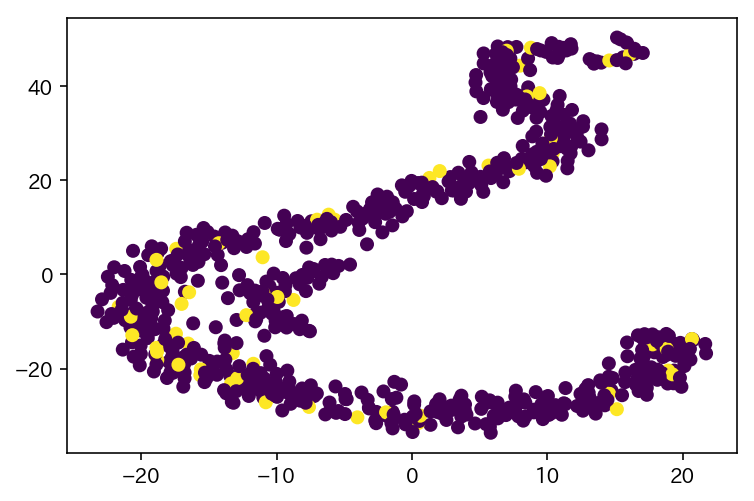

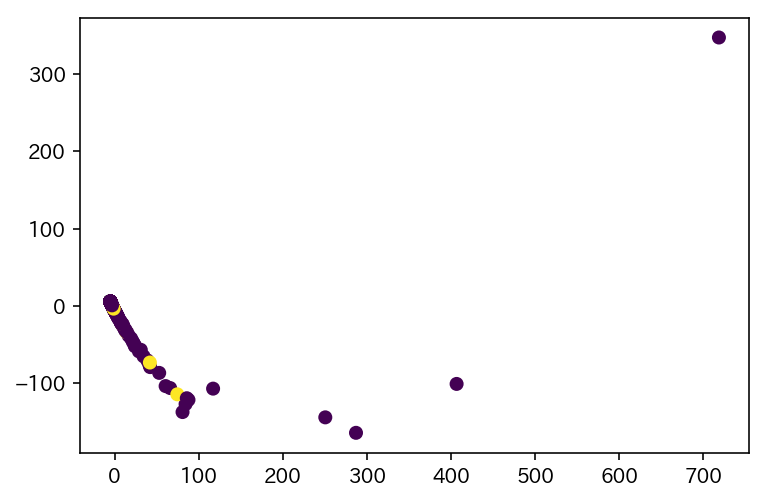

,author,author,author
Unnamed 0,,,
0.0,161,0.062112,0.937888
1.0,527,0.079696,0.920304
2.0,1,0.000000,1.000000
3.0,1,0.000000,1.000000
4.0,1,0.000000,1.000000
5.0,7,0.142857,0.857143
6.0,7,0.142857,0.857143
7.0,1,0.000000,1.000000
8.0,25,0.080000,0.920000


In [26]:
visualize(negaposi_sentence_score.fillna(0.))